In [48]:
%matplotlib inline
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = 8, 8
import pandas as pd

In [9]:
def generate_data():
    xs = np.arange(-5, 5, 1)
    data = [(x - random.random(), (x + random.random())**2) for x in xs]
    data.sort()
    xs = [x for (x, y) in data]
    ys = [y for (x, y) in data]
    return xs, ys

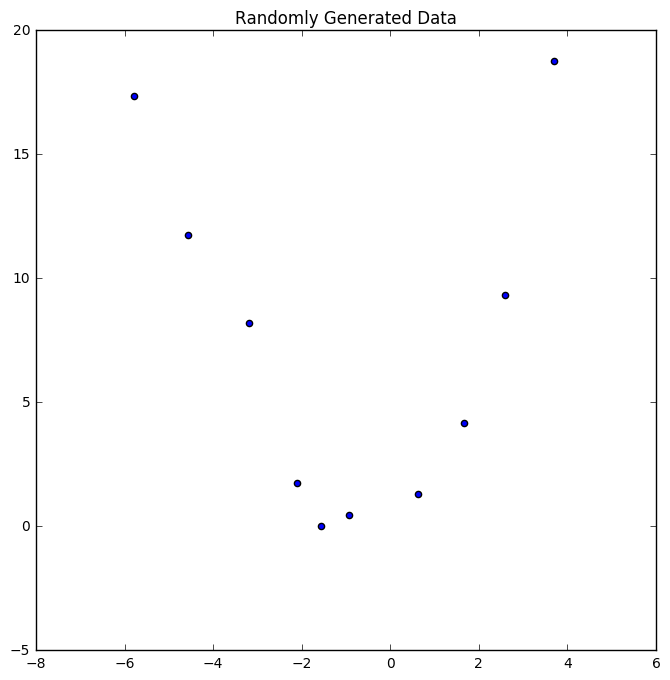

In [10]:
xs, ys = generate_data()
plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.show()

In [11]:
lm = linear_model.LinearRegression()

In [14]:
X = np.vander(xs, 4)
y = ys
print X, y

[[-192.94285253   33.39020843   -5.77842612    1.        ]
 [ -95.51147256   20.89474269   -4.57107675    1.        ]
 [ -32.64392317   10.21413432   -3.19595593    1.        ]
 [  -9.32084501    4.42897801   -2.10451372    1.        ]
 [  -3.80258518    2.43623569   -1.56084454    1.        ]
 [  -0.78534106    0.85121422   -0.92261271    1.        ]
 [   0.23101743    0.37649842    0.61359467    1.        ]
 [   4.64082094    2.7822525     1.66800854    1.        ]
 [  17.55250151    6.7539734     2.59884078    1.        ]
 [  50.28899107   13.624334      3.69111555    1.        ]] [17.357311506298558, 11.759186952676567, 8.2129039564940669, 1.7430938604558943, 0.011156997031936407, 0.44770720808822134, 1.3224758943329282, 4.1620494587360417, 9.3480083316194538, 18.783207581746133]


In [17]:
model = lm.fit(X, y)
predictions = lm.predict(X)
print predictions
for item in zip(model.coef_, ['constant', 'x', 'x^2', 'x^3']):
    print item

[ 17.4908902   12.07586959   6.29670204   2.65329136   1.32564472
   0.29305132   0.73275242   4.00546018   9.33154439  18.94189554]
(0.065635759274990116, 'constant')
(0.99841409089022248, 'x')
(0.55132828317038574, 'x^2')
(0.0, 'x^3')


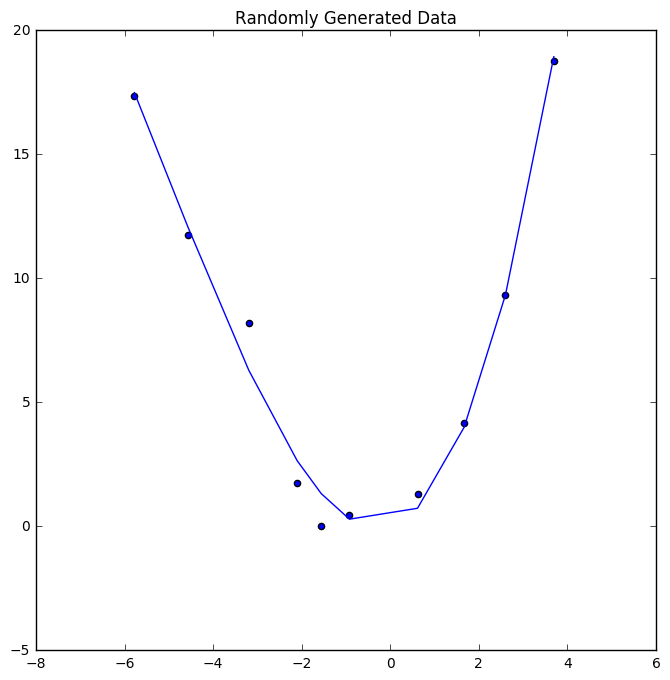

r^2: 0.984422173646


In [18]:
plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", model.score(X, y)

In [24]:
xs2, ys2 = generate_data()
X = np.vander(xs2, 4)
predictions = lm.predict(X)

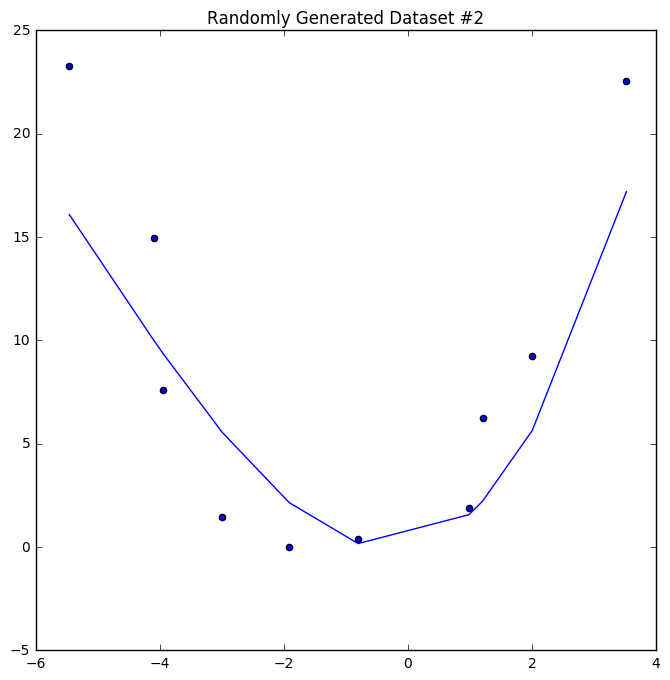

r^2: 0.77141328634


In [25]:
plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", model.score(X, ys2)

In [26]:
rlm = linear_model.Ridge(alpha=4, normalize=True)

In [27]:
X = np.vander(xs, 4)
y = ys
ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

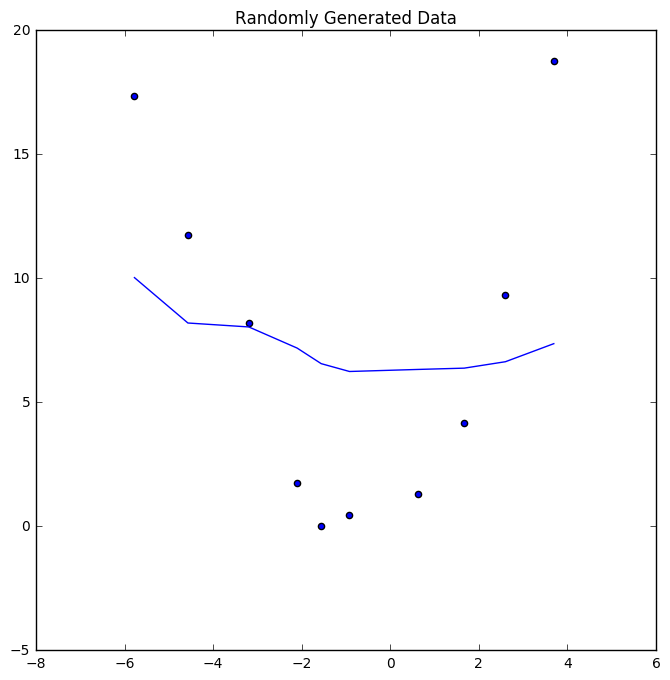

r^2: 0.217024003314


In [41]:
plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys)

In [42]:
for item in zip(ridge_model.coef_, ['constant', 'x', 'x^2', 'x^3']):
    print item

(-0.005475409676841487, 'constant')
(0.10422247477569917, 'x')
(0.032016925553346634, 'x^2')
(0.0, 'x^3')


In [43]:
X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

# plt.scatter(xs2, ys2)
# plt.title("Randomly Generated Dataset #2")
# plt.plot(xs2, predictions)
# plt.show()
print "r^2:", ridge_model.score(X, ys2)

r^2: 0.152785667126


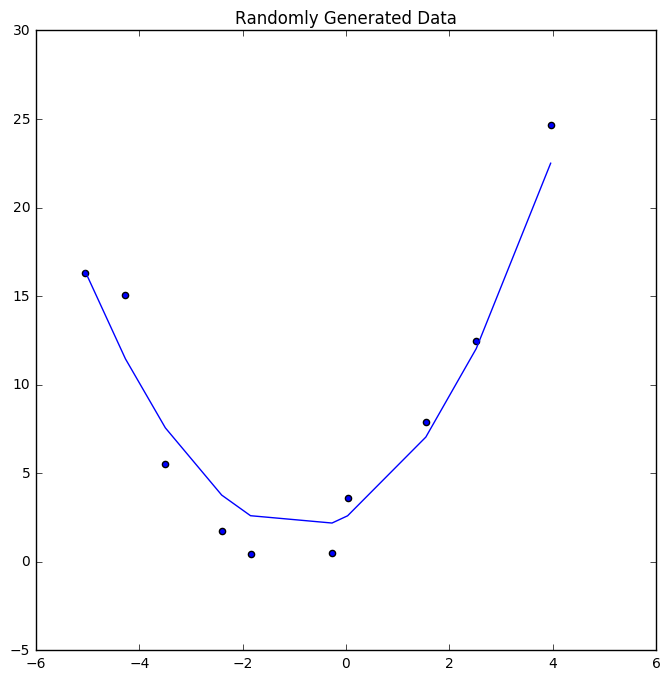

r^2: 0.939856047823
alpha: 0.1


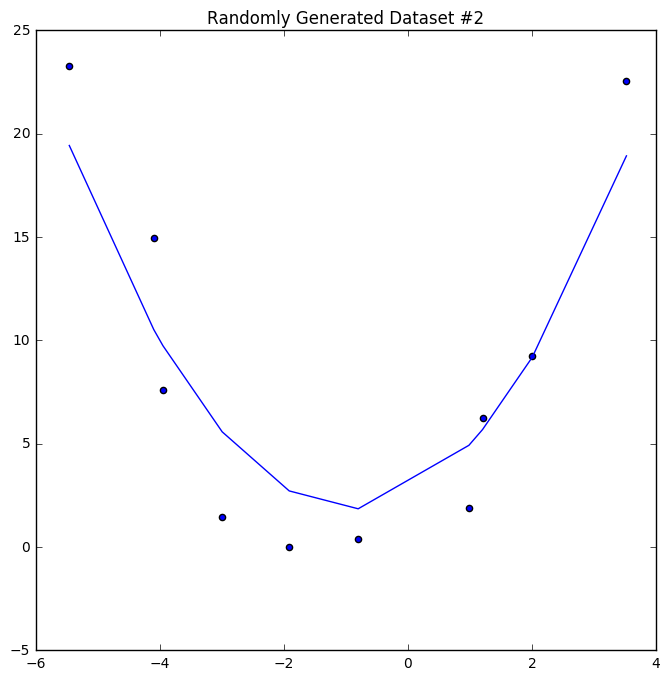

r^2: 0.87297878962


In [44]:
rlmcv = linear_model.RidgeCV(normalize=True)
xs, ys = generate_data()

# Fit the polynomial again with ridge regularization
X = np.vander(xs, 4)
y = ys
ridge_model = rlmcv.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)
plt.title("Randomly Generated Data")
plt.plot(xs, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys)
print "alpha:", rlmcv.alpha_

X = np.vander(xs2, 4)
predictions = ridge_model.predict(X)

plt.scatter(xs2, ys2)
plt.title("Randomly Generated Dataset #2")
plt.plot(xs2, predictions)
plt.show()
print "r^2:", ridge_model.score(X, ys2)

In [45]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [51]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [71]:
y = boston.target
x = df['CRIM']
vectorized_x = np.vander(x, 4)

In [81]:
al = 0.3
rlmcv = linear_model.Ridge(alpha=al, normalize=True)
ridge_model = rlmcv.fit(df, y)
predictions = ridge_model.predict(df)
# plt.scatter(x, y)
# plt.title("CRIM")
# plt.plot(df, predictions)
# plt.show()
print "r^2:", ridge_model.score(df, y)
print "alpha:", al

r^2: 0.708703980227
alpha: 0.3


In [80]:
rlmcv = linear_model.RidgeCV(normalize=True)
ridge_model = rlmcv.fit(df, y)
predictions = ridge_model.predict(df)
# plt.scatter(x, y)
# plt.title("CRIM")
# plt.plot(df, predictions)
# plt.show()
print "r^2:", ridge_model.score(df, y)
print "alpha:", rlmcv.alpha_

r^2: 0.731538965149
alpha: 0.1
